## Imports


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, rescale

# Testing with  Shepp-Logan Phantom

Radon Transform and Filtered back-projection
[Documentation and example](https://scikit-image.org/docs/stable/auto_examples/transform/plot_radon_transform.html)

## Radon Transform

In [12]:
image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect', multichannel=False)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)


### Plot original image and its sinogram

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))


ax1.imshow(image, cmap=plt.cm.Greys_r)
ax2.imshow(sinogram, cmap=plt.cm.Greys_r, extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

ax1.set_title("Original")
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")

fig.tight_layout()
plt.show()

## Filtered Back Projection (FBP)


In [ ]:
reconstruction_fbp = iradon(sinogram, theta=theta, circle=True)
error = reconstruction_fbp - image

imkwargs = dict(vmin=-0.2, vmax=0.2)

### Plot reconstructed image and its error

In [ ]:
print(f"FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5), sharex=True, sharey=True)

ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.imshow(error, cmap=plt.cm.Greys_r, **imkwargs)

ax1.set_title("Reconstruction\nFiltered back projection")
ax2.set_title("Reconstruction error\nFiltered back projection")

plt.show()

# Creating our functions to use with other images

In [13]:
def fbp_image(image, qnt_theta = max(image.shape), scale = 1.0, plot = True):
    # Radon Transform
    ## Setting parameters
    theta = np.linspace(0., 180., qnt_theta, endpoint=False)
    image = rescale(image, scale=scale, mode='reflect', multichannel=False)
    
    sinogram = radon(image, theta=theta, circle=True)
    
    # IRadon Transformed 
    ## Filtered Back-Projection 
    reconstruction_fbp = iradon(sinogram, theta=theta, circle=True)
    
    ## Error of the reconstructed image
    error = reconstruction_fbp - image

    ## Additional arguments to improve the error visualization
    imkwargs = dict(vmin=error.min(), vmax=error.max())
    
    error_rms = np.sqrt(np.mean(error**2))
    
    if(plot):
        
        # Plot results  
        ## Radon - Original Image and Sinogram
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

        ax1.imshow(image, cmap=plt.cm.Greys_r)
        ax2.imshow(sinogram, cmap=plt.cm.Greys_r, extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

        fig.suptitle("FBP process with %d angles" % qnt_theta)
        ax1.set_title("Original")
        ax2.set_title("Radon transform\n(Sinogram)")
        ax2.set_xlabel("Projection angle (deg)")
        ax2.set_ylabel("Projection position (pixels)")

        fig.tight_layout()
        plt.show()


        ## IRadon - Reconstructed Image and its error
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5), sharex=True, sharey=True)

        ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
        ax2.imshow(error, cmap=plt.cm.Greys_r, **imkwargs)

        ax1.set_title("Reconstruction\nFiltered back projection")
        ax2.set_title("Reconstruction error\nFiltered back projection")

        fig.tight_layout()
        plt.show()
        print(f"FBP rms reconstruction error: {error_rms:.3g}")
    
    return reconstruction_fbp, error_rms, sinogram

In [ ]:
image = shepp_logan_phantom()
reconstruction_fbp, error, sinogram = fbp_image(image, scale = 0.4)

In [ ]:
qnt_theta = np.arange(0, 500)
rms_error = np.zeros(len(qnt_theta))

for theta in qnt_theta:
    _, rms_error[theta], _ = fbp_image(image, qnt_theta = theta, scale = 0.4, plot = False)

## Plot error with different theta values

In [ ]:
plt.figure()
plt.plot(qnt_theta, np.log10(rms_error), '--m', linewidth = 2)
plt.title("Error x Quantity of samples")
plt.xlabel("Qnt of samples / angles")
plt.ylabel("RMS error log")
plt.show()

# Testing with images from a real CT Scan

In [3]:
# authors : Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT

import matplotlib.pyplot as plt
import pydicom
import os
import pylibjpeg
from pydicom.data import get_testdata_file

def read_dcm(img_name):
    print(__doc__)
    
    os.chdir('images_dcm/')
    filename = get_testdata_file(img_name)
    dataset = pydicom.dcmread(img_name)
    os.chdir('../')

    # Normal mode:
    print()
    print("Filename.........:", filename)
    print("Storage type.....:", dataset.SOPClassUID)
    print()

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name...:", display_name)
    print("Patient id.......:", dataset.PatientID)
    print("Modality.........:", dataset.Modality)
    print("Study Date.......:", dataset.StudyDate)

    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)

    # use .get() if not sure the item exists, and want a default value if missing
    print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

    # plot the image using matplotlib
#     print(dataset.pixel_array)
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.show()
    return dataset.pixel_array

Automatically created module for IPython interactive environment

Filename.........: None
Storage type.....: 1.2.840.10008.5.1.4.1.1.2

Patient's name...: CQ500-CT-183, 
Patient id.......: CQ500-CT-183
Modality.........: CT
Study Date.......: 
Image size.......: 512 x 512, 148246 bytes
Pixel spacing....: [0.488281, 0.488281]
Slice location...: 14.438


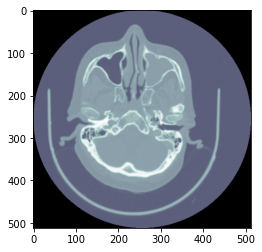

In [8]:
img = read_dcm('CT000209.dcm')

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


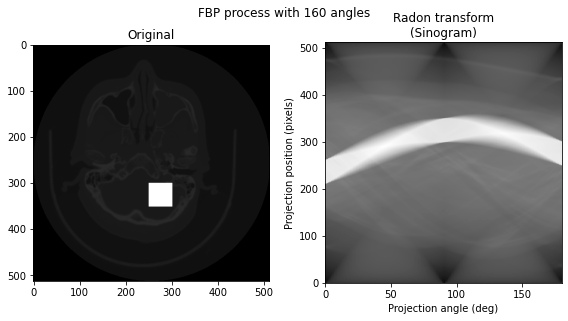

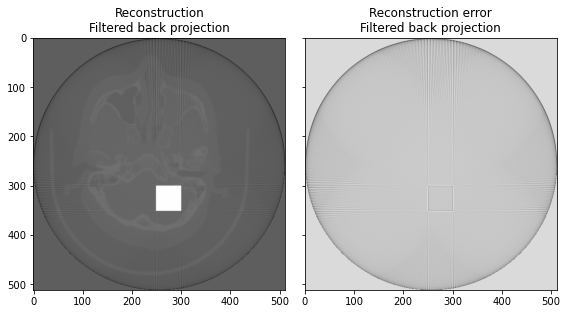

FBP rms reconstruction error: 0.0399


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 0.03994547771122134,
 array([[-31.24266423, -16.89205142, -15.94020728, ..., -14.50657845,
         -14.38555224, -13.78415336],
        [-29.26466773, -18.06576404, -15.69641888, ..., -13.85194227,
         -14.14401385, -14.9588696 ],
        [-27.77492943, -19.82665213, -15.80874712, ..., -13.14893864,
         -14.25720231, -16.7224199 ],
        ...,
        [-26.7900206 , -18.83217883, -14.72413885, ..., -14.48708359,
         -16.27128254, -21.9335087 ],
        [-27.77987335, -16.75958881, -14.28591058, ..., -14.18231682,
         -15.83701806, -19.86365739],
        [-29.26515602, -14.98345259, -14.11234051, ..., -14.82098863,
         -15.66409432, -18.08999017]]))

In [14]:
artefact_density = img.max() * 100.0

img_with_rect = np.copy(img)
img_with_rect = cv2.rectangle(img_with_rect, (250, 300), (300, 350), artefact_density, -1)

fbp_image(img_with_rect)

In [ ]:
artefact_density = img.max() * 100.0

img_with_circle = np.copy(img)
img_with_circle = cv2.circle(img_with_circle, (300, 350), 20, artefact_density, -1)

fbp_image(img_with_circle)

In [ ]:
artefact_density = img.max() * 100.0

img_with_text = np.copy(img)
img_with_text = cv2.putText(img_with_text, "anything", (100, 300), cv2.FONT_HERSHEY_SIMPLEX, 1, artefact_density)

fbp_image(img_with_text)

## Algoritmo simples de MAR

In [21]:
def get_artifact_from_data(image, threshold):
    x, y = image.shape
    image_metal = np.zeros((x, y))
    for i in range(x):
        for j in range(y):
            if(image[i, j] >= threshold):
                image_metal[i, j] = threshold
    return image_metal

def Radon(image, number_angles = 500):
    angles = np.linspace(0, 180, number_angles)
    sinogram = radon(image, theta = angles, circle = False, preserve_range=True)
    return sinogram

def Iradon(sinogram, number_angles = 500):
    angles = np.linspace(0, 180, number_angles)
    fbp = iradon(sinogram, theta = angles, circle = False)
    return fbp

def simple_MAR(img, threshold = 3000):
    sinogram = Radon(img)
    image_metal = get_artifact_from_data(img, threshold)
    sinogram_metal = Radon(image_metal)
    sinogram_corrected = sinogram - sinogram_metal
    fbp = Iradon(sinogram_corrected)
    return fbp

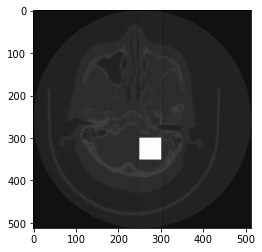

In [24]:
fbp_rect = simple_MAR(img_with_rect)
plt.imshow(fbp_rect, cmap=plt.cm.Greys_r)